# Figures

This code is for plotting purpose.

In [2]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# parameters
dx = 1.0  # normally dx = dy
dt = 0.01 

Nx = 32  # normally the total number of lattice = 2^(some integer)
Ny = 32  # this is required for Fourier transform later
Nt = 1000000

alpha, beta, kappa = -1.0, 1.0, 1.0
phi0 = 0.0

# array of cartesian coordinates (needed for plotting)
x = np.arange(0, Nx)*dx
y = np.arange(0, Ny)*dx
y, x = np.meshgrid(y, x) 

# create a phi-matrix of size Nx by Ny (similarly for mu-matrix)
phi = np.zeros((Nx, Ny))  # phi at current timestep
mu = np.zeros((Nx, Ny))

# method to calculate the laplacian
def laplacian(phi):
    # axis=0 --> roll along x-direction
    # axis=1 --> roll along y-direction
    laplacianphi = \
        (np.roll(phi,+1,axis=0) - 2.0*phi + np.roll(phi,-1,axis=0))/(dx*dx) \
      + (np.roll(phi,+1,axis=1) - 2.0*phi + np.roll(phi,-1,axis=1))/(dx*dx)

    return laplacianphi

# takes in phi at time n and outputs phi at time n+1
def update(phi):
    mu = alpha*phi + beta*phi*phi*phi - kappa*laplacian(phi)
    phi = phi + dt*laplacian(mu)
    
    return phi

# plot configurations of phi0, phi1, phi2
def plot(phi0, phi1, phi2, label0, label1, label2):
    # initialize figure and movie objects
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(6,2)) 

    ax1.set_title(label0)
    ax1.set_aspect('equal')
    colormap = ax1.pcolormesh(x, y, phi0, shading='auto', vmin=-1.2, vmax=1.2)

    ax2.set_title(label1)
    ax2.set_aspect('equal')
    colormap = ax2.pcolormesh(x, y, phi1, shading='auto', vmin=-1.2, vmax=1.2)

    ax3.set_title(label2)
    ax3.set_aspect('equal')
    colormap = ax3.pcolormesh(x, y, phi2, shading='auto', vmin=-1.2, vmax=1.2)

    plt.show()
    
# run simulation for Nt timesteps for given phi0
def run(phi0):
    # initialization
    phi = phi0*np.ones((Nx, Ny)) + np.random.normal(0.0, 0.001, (Nx, Ny))

    for n in range(0, Nt, 1):
        phi = update(phi)
        
    return phi

plot(run(-0.2), run(0.0), run(0.2), "$\phi_0$ = -0.2", "$\phi_0$ = 0.0", "$\phi_0$ = 0.2")

KeyboardInterrupt: 

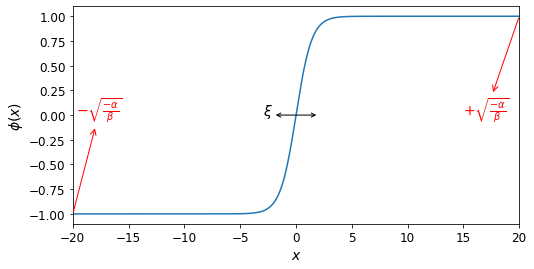

In [3]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4)) 

alpha, beta, kappa = -1.0, 1.0, 1.0
xi = np.sqrt(2*kappa/-alpha)
x = np.arange(-20, 20, 0.001)
phi = np.tanh(x/xi)
dphidx = 1/(xi*np.cosh(x/xi)**2)
f_density = 0.5*alpha*phi**2 + 0.25*phi**4 + 0.25*kappa*dphidx**2

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$\phi(x)$', fontsize=14)
ax.set_xlim(-20,20)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.plot(x, phi)

ax.annotate('', c='black',
            xy=(-2.0,0.0),  # location of the end point 
            xytext=(2.0,0.0),  # location of the start point
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$\\xi$', c='black', fontsize=14, xy=(-3,0.0))

ax.annotate('$-\sqrt{\\frac{-\\alpha}{\\beta}}$', c='red', fontsize=14,
            xy=(-20,-1.0), xytext=(-19.7,0.0),  
            arrowprops=dict(edgecolor='red', facecolor='red', arrowstyle='<-'))

ax.annotate('$+\sqrt{\\frac{-\\alpha}{\\beta}}$', c='red', fontsize=14,
            xy=(20,1.0), xytext=(15,0.0),  
            arrowprops=dict(edgecolor='red', facecolor='red', arrowstyle='<-'))

plt.show()

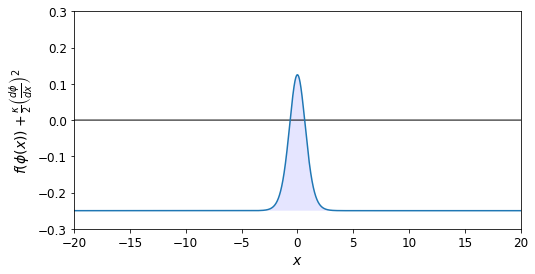

In [3]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(8,4)) 
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$f(\phi(x))+\\frac{\\kappa}{2}\\left(\\frac{d\phi}{dx}\\right)^2$', fontsize=14)
ax.set_xlim(-20,20)
ax.set_ylim(-0.3,0.3)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot(x, x*0, c='black', linewidth=1)
ax.plot(x, f_density)
ax.fill_between(x, f_density, -alpha**2/(4*beta)*np.ones(np.shape(x)), facecolor='blue', alpha=0.1)
plt.show()

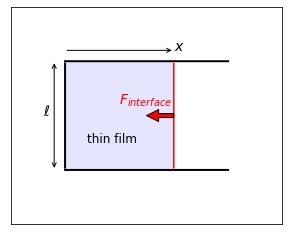

In [4]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(6,4)) 

x = np.arange(1, 4, 0.001)
x1 = np.arange(1, 3, 0.001)

ax.set_xlim(0, 5)
ax.set_ylim(-2, 2)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x1, np.ones(len(x1))*-1, np.ones(len(x1))*1, facecolor='blue', alpha=0.1)

ax.plot(x, np.ones(len(x))*-1, c='black', linewidth=2)
ax.plot(x, np.ones(len(x))*1, c='black', linewidth=2)

ax.annotate('', xy=(1,-1), xytext=(1,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(3,-1), xytext=(3,1), arrowprops=dict(edgecolor='red', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(0.8,-1), xytext=(0.8,1), arrowprops=dict(edgecolor='black', arrowstyle='<->'))
ax.annotate('', xy=(3,1.2), xytext=(1,1.2), arrowprops=dict(edgecolor='black', arrowstyle='->'))
ax.annotate('', xy=(2.5,0.0), xytext=(3,0.0), arrowprops=dict(edgecolor='black', facecolor='red'))

ax.annotate('$\\ell$', c='black', fontsize=14, xy=(0.6,0.0))
ax.annotate('$x$', c='black', fontsize=14, xy=(3,1.2))
ax.annotate('$F_{interface}$', c='red', fontsize=14, xy=(2.0,0.2))
ax.annotate('thin film', c='black', fontsize=12, xy=(1.4,-0.5))

plt.show()

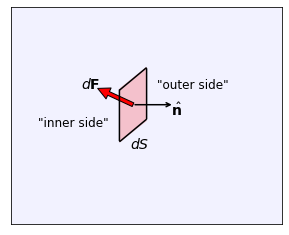

In [5]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(6,4)) 

x = np.arange(0, 5, 0.001)
x1 = np.arange(2, 2.5, 0.001)

ax.set_xlim(0, 5)
ax.set_ylim(-2, 2)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.annotate('', xy=(1.6,0.5), xytext=(2.25,0.2), arrowprops=dict(edgecolor='black', facecolor='red'))

ax.fill_between(x, np.ones(len(x))*-2, np.ones(len(x))*2, facecolor='blue', alpha=0.05)
ax.fill_between(x1, 0.8*x1 - 2.1, 0.8*x1 - 1.1, facecolor='red', alpha=0.2)

ax.annotate('', xy=(2,-0.5), xytext=(2,0.51), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(2.5,-0.1), xytext=(2.5,0.9), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(1.98,0.45), xytext=(2.52,0.9), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(1.98,-0.5), xytext=(2.52,-0.05), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(3,0.2), xytext=(2.25,0.2), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1.5))

ax.annotate('$\hat{\mathbf{n}}$', c='black', fontsize=14, xy=(2.95,0.0))
ax.annotate('$dS$', c='black', fontsize=14, xy=(2.2,-0.6))
ax.annotate('$d\mathbf{F}$', c='black', fontsize=14, xy=(1.3,0.5))
ax.annotate('"inner side"', c='black', fontsize=12, xy=(0.5,-0.2))
ax.annotate('"outer side"', c='black', fontsize=12, xy=(2.7,0.5))

plt.show()

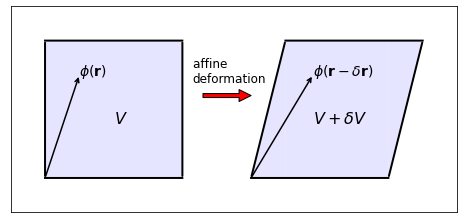

In [5]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(8,4)) 

x = np.arange(0.5, 2.5, 0.001)
x1 = np.arange(3.5, 4, 0.001)
x2 = np.arange(4, 5.5, 0.001)
x3 = np.arange(5.5, 6, 0.001)
x4 = np.arange(3.5, 5.5, 0.001)
x5 = np.arange(4, 6, 0.001)

ax.set_xlim(0, 6.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x, np.ones(len(x))*-1, np.ones(len(x))*1, facecolor='blue', alpha=0.1)
ax.fill_between(x1, np.ones(len(x1))*-1, 4*x1-15, facecolor='blue', alpha=0.1)
ax.fill_between(x2, np.ones(len(x2))*-1, np.ones(len(x2))*1, facecolor='blue', alpha=0.1)
ax.fill_between(x3, 4*x3-23, np.ones(len(x3))*1, facecolor='blue', alpha=0.1)

ax.plot(x, np.ones(len(x))*-1, c='black', linewidth=2)
ax.plot(x, np.ones(len(x))*1, c='black', linewidth=2)
ax.plot(x4, np.ones(len(x4))*-1, c='black', linewidth=2)
ax.plot(x5, np.ones(len(x5))*1, c='black', linewidth=2)

ax.annotate('', xy=(0.5,-1), xytext=(0.5,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(2.5,-1), xytext=(2.5,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(4,1), xytext=(3.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(6,1), xytext=(5.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))

ax.annotate('', xy=(1,0.5), xytext=(0.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(4.4,0.5), xytext=(3.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1.5))

ax.annotate('', xy=(3.5,0.2), xytext=(2.8,0.2), arrowprops=dict(edgecolor='black', facecolor='red'))

ax.annotate('$\phi(\mathbf{r})$', c='black', fontsize=14, xy=(1,0.5))
ax.annotate('$\phi(\mathbf{r}-\delta\mathbf{r})$', c='black', fontsize=14, xy=(4.4,0.5))
ax.annotate('$V$', c='black', fontsize=16, xy=(1.5,-0.2))
ax.annotate('$V+\delta V$', c='black', fontsize=16, xy=(4.4,-0.2))
ax.annotate('affine \ndeformation', c='black', fontsize=12, xy=(2.65,0.4))

plt.show()

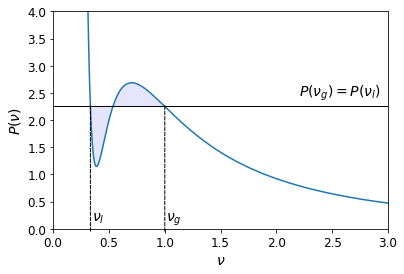

In [6]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4)) 

alpha, beta, n_b = -1.0, 1.0, 2.0
nu = np.arange(0.0001, 3, 0.0001)
nu_w = np.arange(1/3, 1, 0.0001)

def P(nu):
    P = nu**(-1)*(alpha*(nu**(-1) - n_b) + beta*(nu**(-1) - n_b)**3) \
        - 0.5*alpha*(nu**(-1) - n_b)**2 \
        - 0.25*beta*(nu**(-1) - n_b)**4 + 2
    return P

ax.set_xlabel('$\\nu$', fontsize=14)
ax.set_ylabel('$P(\\nu)$', fontsize=14)
ax.set_xlim(0,3)
ax.set_ylim(0,4)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.plot(nu, P(nu))
ax.plot(nu, P(1/3)*np.ones(len(nu)), color='black', linewidth=1)

ax.fill_between(nu_w, P(1/3)*np.ones(np.shape(nu_w)), P(nu_w), facecolor='blue', alpha=0.1)

ax.annotate('', xy=(1/3,-0.08), xytext=(1/3,2.3), fontsize=14, annotation_clip=False,
            arrowprops=dict(edgecolor='black', arrowstyle='-', linestyle='--', linewidth=1))
ax.annotate('', xy=(1,-0.08), xytext=(1,2.3), fontsize=14, annotation_clip=False,
            arrowprops=dict(edgecolor='black', arrowstyle='-', linestyle='--', linewidth=1))

ax.annotate('$\\nu_l$', xy=(1/3+0.015,0.15), fontsize=14, annotation_clip=False)
ax.annotate('$\\nu_g$', xy=(1+0.015,0.15), fontsize=14, annotation_clip=False)
ax.annotate('$P(\\nu_g)=P(\\nu_l)$', xy=(2.2,2.45), fontsize=14, annotation_clip=False)

plt.show()

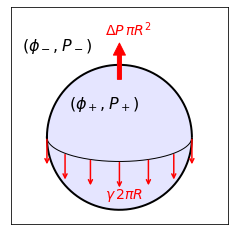

In [7]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(4,4)) 

x = np.arange(-1, 1, 0.0001)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.2, 1.8)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x, -np.sqrt(1-x*x), np.sqrt(1-x*x), facecolor='blue', alpha=0.1)
ax.plot(x, -np.sqrt(1-x*x), c='black', linewidth=2)
ax.plot(x, np.sqrt(1-x*x), c='black', linewidth=2)
ax.plot(x, -np.sqrt(1-x*x)/3, c='black', linewidth=1)

ax.annotate('', xy=(-1,-0.4), xytext=(-1,0), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(1,-0.4), xytext=(1,0), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(0,-0.4-0.32), xytext=(0,0-0.32), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(0.4,-0.4-0.29), xytext=(0.4,0-0.29), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(-0.4,-0.4-0.29), xytext=(-0.4,0-0.29), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(0.75,-0.4-0.21), xytext=(0.75,0-0.21), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(-0.75,-0.4-0.21), xytext=(-0.75,0-0.21), arrowprops=dict(edgecolor='red', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(0,1.3), xytext=(0,0.8), arrowprops=dict(edgecolor='red', facecolor='red'))

ax.annotate('$(\phi_+,P_+)$', c='black', fontsize=16, xy=(-0.7,0.4))
ax.annotate('$(\phi_-,P_-)$', c='black', fontsize=16, xy=(-1.35,1.2))
ax.annotate('$\gamma \, 2\pi R$', c='red', fontsize=14, xy=(-0.2,-0.85))
ax.annotate('$\Delta P \, \pi R^2$', c='red', fontsize=14, xy=(-0.2,1.4))

plt.show()

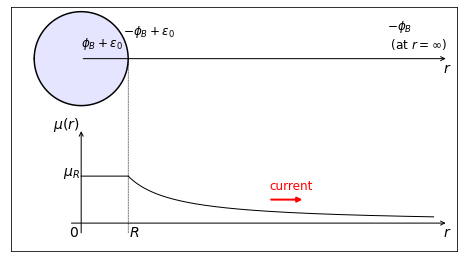

In [8]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(8,6)) 

x = np.arange(-1, 1, 0.0001)
x1 = np.arange(1, 7.5, 0.0001)
x2 = np.arange(0, 1.0, 0.0001)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x, -np.sqrt(1-x*x), np.sqrt(1-x*x), facecolor='blue', alpha=0.1)
ax.plot(x, -np.sqrt(1-x*x), c='black', linewidth=1.5)
ax.plot(x, np.sqrt(1-x*x), c='black', linewidth=1.5)
ax.plot(x1, 1/x1-3.5, c='black', linewidth=1)
ax.plot(x2, 1.0*np.ones(len(x2))-3.5, c='black', linewidth=1)

ax.annotate('', xy=(7.8,0), xytext=(0,0), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1))
ax.annotate('', xy=(7.8,-3.5), xytext=(-0.25,-3.5), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1))
ax.annotate('', xy=(0,-1.5), xytext=(0,-3.75), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1))
ax.annotate('', xy=(1,0), xytext=(1,-3.75), arrowprops=dict(edgecolor='black', linestyle='--', arrowstyle='-', linewidth=0.5))

ax.annotate('$\mu(r)$', c='black', fontsize=14, xy=(-0.6,-1.5))
ax.annotate('$0$', c='black', fontsize=14, xy=(-0.25,-3.8))
ax.annotate('$r$', c='black', fontsize=14, xy=(7.7,-3.8))
ax.annotate('$R$', c='black', fontsize=14, xy=(1.01,-3.8))
ax.annotate('$r$', c='black', fontsize=14, xy=(7.7,-0.3))
ax.annotate('$\mu_R$', c='black', fontsize=14, xy=(-0.38,-2.5))

ax.annotate('$\phi_B+\epsilon_0$', c='black', fontsize=12, xy=(0,0.25))
ax.annotate('$-\phi_B+\epsilon_0$', c='black', fontsize=12, xy=(0.9,0.5))
ax.annotate('$-\phi_B$ \n (at $r=\infty$)', c='black', fontsize=12, xy=(6.5,0.2))
ax.annotate('current', c='red', fontsize=12, xy=(4,-2.8))

ax.annotate('', xy=(4.75,-3), xytext=(4,-3), size=10, arrowprops=dict(edgecolor='red', facecolor='red', arrowstyle='-|>', linewidth=2))

ax.set_xlim(-1.5, 8)
ax.set_ylim(-4.1,1.1)
ax.set_aspect(1)

plt.show()

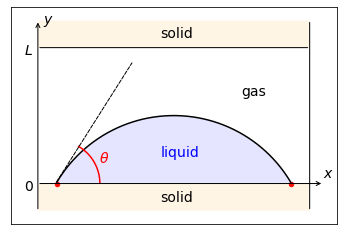

In [178]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(6,4)) 

x = np.arange(-0.86, 0.86, 0.0001)
x1 = np.arange(-1, 1, 0.0001)
x2 = np.arange(-0.7, -0.5437, 0.0001)
xp = [-0.86, 0.86]
yp = [0, 0]
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.3, 1.3)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x, np.sqrt(1-x*x)-0.5, facecolor='blue', alpha=0.1)
ax.plot(x, np.sqrt(1-x*x)-0.5, c='black', linewidth=1.5)
ax.plot(x2, np.sqrt(0.1-(x2+0.86)*(x2+0.86)), c='red', linewidth=1.5)
ax.scatter(xp, yp, s=20, color='red', alpha=1)

ax.fill_between(x1, -0.2, 0.0, facecolor='orange', alpha=0.1)
ax.fill_between(x1, 1, 1.2, facecolor='orange', alpha=0.1)

ax.annotate('', xy=(-1,0), xytext=(1.1,0), arrowprops=dict(edgecolor='black', arrowstyle='<-', linewidth=1))
ax.annotate('', xy=(-1,1), xytext=(1,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1))
ax.annotate('', xy=(1,-0.2), xytext=(1,1.2), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1))
ax.annotate('', xy=(-1,-0.2), xytext=(-1,1.2), arrowprops=dict(edgecolor='black', arrowstyle='<-', linewidth=1))
ax.annotate('', xy=(-0.3,0.9), xytext=(-0.87,0), arrowprops=dict(edgecolor='black', arrowstyle='-', linestyle='--', linewidth=1))

ax.annotate('$L$', c='black', fontsize=14, xy=(-1.1,0.95))
ax.annotate('$0$', c='black', fontsize=14, xy=(-1.1,-0.05))
ax.annotate('$\\theta$', c='red', fontsize=14, xy=(-0.55,0.15))
ax.annotate('liquid', c='blue', fontsize=14, xy=(-0.1,0.2))
ax.annotate('solid', c='black', fontsize=14, xy=(-0.1,-0.13))
ax.annotate('solid', c='black', fontsize=14, xy=(-0.1,1.07))
ax.annotate('gas', c='black', fontsize=14, xy=(0.5,0.65))
ax.annotate('$x$', c='black', fontsize=14, xy=(1.1,0.04))
ax.annotate('$y$', c='black', fontsize=14, xy=(-0.96,1.18))

plt.show()

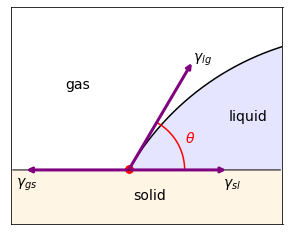

In [7]:
### THIS BLOCK OF CODE IS JUST FOR PLOTTING PURPOSES -- YOU CAN IGNORE IT ###
fig, ax = plt.subplots(figsize=(6,4)) 

x = np.arange(-0.86, 0.86, 0.0001)
x1 = np.arange(-1.3, -0.3, 0.0001)
x2 = np.arange(-0.76, -0.66, 0.0001)   
xp = [-0.865, 0.86]
yp = [0.005, 0]
ax.set_xlim(-1.3, -0.3)
ax.set_ylim(-0.2, 0.6)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x, np.sqrt(1-x*x)-0.5, facecolor='blue', alpha=0.1)
ax.plot(x, np.sqrt(1-x*x)-0.5, c='black', linewidth=1.5)
ax.plot(x2, np.sqrt(0.04-(x2+0.86)*(x2+0.86)), c='red', linewidth=1.5)
ax.fill_between(x1, -0.2, 0.0, facecolor='orange', alpha=0.1)
ax.annotate('', xy=(-1.3,0), xytext=(-0.3,0), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1))
ax.scatter(xp, yp, s=60, color='red', alpha=1)

ax.annotate('', xytext=(-0.63,0.4), xy=(-0.866,0), arrowprops=dict(edgecolor='purple', arrowstyle='<-', linewidth=3))
ax.annotate('', xytext=(-0.5,0.0), xy=(-0.866,0), arrowprops=dict(edgecolor='purple', arrowstyle='<-', linewidth=3))
ax.annotate('', xytext=(-1.25,0.0), xy=(-0.866,0), arrowprops=dict(edgecolor='purple', arrowstyle='<-', linewidth=3))
ax.annotate('$\gamma_{sl}$', fontsize=14, xy=(-0.52,-0.06))
ax.annotate('$\gamma_{gs}$', fontsize=14, xy=(-1.28,-0.06))
ax.annotate('$\gamma_{lg}$', fontsize=14, xy=(-0.63,0.4))
ax.annotate('solid', fontsize=14, xy=(-0.85,-0.11))
ax.annotate('liquid', fontsize=14, xy=(-0.5,0.18))
ax.annotate('gas', fontsize=14, xy=(-1.1,0.3))
ax.annotate('$\\theta$', c='red', fontsize=14, xy=(-0.66,0.1))

plt.show()
